# **CONNECT ke GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
files_dir = "/content/drive/MyDrive/SIB6"
os.chdir(files_dir)

# **TUJUAN**

Untuk mengembangkan sebuah model machine learning yang mampu memprediksi kualitas air berdasarkan fitur-fitur yang ada dalam dataset. Sehingga kita bisa memantau kualitas air bersih untuk kebutuhan sehari-hari

# **IMPORT LIBRARY**

In [ ]:
# Load libraries
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

import numpy as np

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# **LOAD DATA**

1. **id**: Ini adalah kolom yang berisi ID unik untuk setiap baris dalam dataset. ID ini membantu dalam mengidentifikasi dan membedakan setiap entri atau pengamatan dalam dataset.

2. **categoryA - categoryF**: Ini adalah enam kolom kategori yang masing-masing memiliki sufiks A hingga F. Kolom-kolom ini berisi informasi tentang berbagai fitur kategoris untuk setiap entri dalam dataset, seperti negara tempat pengumpulan data, lokasi pengambilan sampel, media sampel, dan sebagainya.

3. **featureA - featureI**: Ini adalah sembilan kolom fitur dengan sufiks A hingga I. Setiap kolom ini berisi berbagai fitur demografis yang mempengaruhi polusi air di suatu wilayah tertentu. Contohnya mungkin termasuk kerapatan penduduk, GDP (PDB), tingkat kekeringan di wilayah tersebut, tingkat melek huruf siswa di wilayah tersebut, dan sebagainya.

4. **compositionA - compositionJ**: Ini adalah sepuluh kolom komposisi dengan sufiks dari A hingga J. Setiap kolom ini berisi informasi tentang komposisi dari berbagai elemen dalam air, seperti kandungan kertas, limbah plastik, kardus, dan lain sebagainya. Ini membantu dalam memahami konten kimia atau fisika dari air yang dianalisis.

5. **unit**: Ini adalah kolom yang menunjukkan satuan pengukuran untuk nilai-nilai dalam kolom hasil. Misalnya, ini bisa menjadi satuan seperti ppm (bagian per juta), mg/L (miligram per liter), atau satuan lainnya yang sesuai dengan jenis pengukuran.

6. **result**: Ini adalah kolom target, yang berisi nilai numerik yang mengukur kualitas air. Nilai dalam kolom ini mencerminkan kualitas air berdasarkan berbagai faktor yang ada dalam dataset, seperti kategori, fitur, dan komposisi. Tujuannya adalah untuk memprediksi nilai-nilai ini berdasarkan informasi yang tersedia dalam kolom-kolom lainnya.


In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [ ]:
# Load Train set
df_train = pd.read_csv("dataset/train.csv")
print(f"Train set shape:\n{df_train.shape}\n")

# Load Test set
df_test = pd.read_csv("dataset/test.csv")
print(f"Test set shape:\n{df_test.shape}")

Train set shape:
(13000, 28)

Test set shape:
(7000, 27)


data train terdiri dari 13.000 rows data dengan 28 kolom (27 fitur dan 1 target), pada data test tedapat 7.000 rows data untuk testing dengan 27 fitur. (data test tidak memiliki results karna data test akan di gunakan untuk testing model yang sudah di latih dengan data train dan data validation)

In [ ]:
df_train.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,catA_1,catB_0,catC_718,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000458
1,91ab3eb3bcf6c8c1c5fe2da9ba671aa5a48c7369d9a50f...,catA_1,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000335
2,7128c51c554735d6c81862684ad6005ae12d2edbcd4644...,catA_15,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_4,0.054072
3,c8144b52e4f63014de0a0d8e1c629bf0b05cb2696cfc23...,catA_0,catB_0,catC_935,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_5,0.061143
4,88d15a5b2df6692f23d105ff1ae82ae026be00c9271eef...,catA_22,catB_0,catC_1325,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_15,0.015439


In [ ]:
df_test.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit
0,939edadbc8e0cddf21c8c5710c4f2f909abd36c196aee8...,catA_6,catB_0,catC_55,catD_0,catE_1,catF_0,325435.125,1.728675,0.032407,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,unit_7
1,fcfed000585350fdc6a982bd1146cd8cdd71d989a2fb01...,catA_6,catB_0,catC_1638,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_7
2,917b412b73b7c1c83f779d2f350acda4d2b14804579e79...,catA_17,catB_0,catC_1400,catD_0,catE_16,catF_0,-19688.875,25.982190,0.000000,...,21.4,9.7,0.0,46.7,2.6,2.4,7.7,21.23,6.1,unit_12
3,012d646dbd712fd4b752aa8761dc18aaf28643c262f859...,catA_5,catB_0,catC_204,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_0
4,77c69c2a873444dfef22131bada7d9504ad731ca8df55d...,catA_5,catB_0,catC_1282,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_0


# **EXPLORATORY DATA ANALYSIS**

## Cek Tipe Data

Setelah, mengetahui deskripsi dataset, kami melakukan cek tipe data untuk masing masing kolom dalam dataset.

In [ ]:
df_train.dtypes

id               object
categoryA        object
categoryB        object
categoryC        object
categoryD        object
categoryE        object
categoryF        object
featureA        float64
featureB        float64
featureC        float64
featureD        float64
featureE        float64
featureF        float64
featureG        float64
featureH        float64
featureI        float64
compositionA    float64
compositionB    float64
compositionC    float64
compositionD    float64
compositionE    float64
compositionF    float64
compositionG    float64
compositionH    float64
compositionI    float64
compositionJ    float64
unit             object
result          float64
dtype: object

In [ ]:
df_test.dtypes

id               object
categoryA        object
categoryB        object
categoryC        object
categoryD        object
categoryE        object
categoryF        object
featureA        float64
featureB        float64
featureC        float64
featureD        float64
featureE        float64
featureF        float64
featureG        float64
featureH        float64
featureI        float64
compositionA    float64
compositionB    float64
compositionC    float64
compositionD    float64
compositionE    float64
compositionF    float64
compositionG    float64
compositionH    float64
compositionI    float64
compositionJ    float64
unit             object
dtype: object

In [ ]:
df_train.describe()

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,result
count,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,13000.000000,1.293600e+04,12936.000000,1.293600e+04,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,13000.000000
mean,116559.238066,4.526278,0.132972,150.341104,26.446181,0.217538,2.335365e+12,15.047186,5.020210e+07,0.164923,7.708228,23.627522,1.296887,32.038122,3.178698,2.024316,11.214700,23.386089,18.942594,0.144223
std,146502.011917,3.180817,0.264148,75.093666,6.665619,2.380893,8.937298e+11,32.000372,2.412360e+07,0.743228,3.208687,6.433507,3.724154,11.098175,1.098585,2.964965,4.860118,5.937944,4.096265,0.224062
min,-83749.750000,1.064468,0.000000,18.148547,3.875411,0.000000,2.887150e+10,0.000000,5.300380e+05,0.000000,2.200000,0.000000,0.000000,12.780000,1.380000,0.000000,1.450000,0.760000,6.100000,0.000000
25%,56744.750000,4.363288,0.005718,122.299437,24.625503,0.000000,1.464509e+12,0.000000,2.586796e+07,0.000000,5.830000,17.700000,0.000000,30.000000,3.000000,0.000000,9.000000,22.260000,18.900000,0.003875
50%,75808.375000,4.457840,0.005718,122.299437,30.831906,0.000000,2.806036e+12,0.000000,5.094169e+07,0.000000,10.000000,26.000000,0.000000,32.000000,3.000000,0.000000,9.000000,22.260000,20.000000,0.027909
75%,75808.375000,4.457840,0.032407,137.976566,30.831906,0.000000,2.806036e+12,0.000000,7.117635e+07,0.000000,10.000000,26.000000,1.940000,32.000000,3.000000,2.000000,12.330000,27.250000,20.000000,0.168678
max,582211.000000,25.982190,0.729194,511.475928,38.767234,100.000000,3.781699e+12,87.158924,7.117635e+07,4.000000,21.400000,44.050000,30.460000,62.300000,9.200000,7.900000,20.200000,47.830000,37.830000,1.000000


setelah mengetahui tipe data di tiap kolom, kami lakukan cek deskripsi statistik seperti diatas. pada tahap ini di temukan banyak fitur ber value(0)

In [ ]:
# Inisialisasi list untuk menyimpan hasil perhitungan
result_data = []

# Menghitung jumlah nilai 0 dan persentase nilai 0 dalam setiap kolom numerik
for kolom in df_train.select_dtypes(include='number').columns:
    count0 = (df_train[kolom] == 0).sum()
    total_entries = df_train[kolom].shape[0]
    percent_zeros = (count0 / total_entries) * 100
    result_data.append({'Fitur': kolom, 'Jumlah': count0, 'Persentase': percent_zeros})

# Membuat DataFrame dari hasil perhitungan
df_zero = pd.DataFrame(result_data)
df_zero

,Fitur,Jumlah,Persentase
0,featureA,0,0.000000
1,featureB,0,0.000000
2,featureC,359,2.761538
3,featureD,0,0.000000
4,featureE,0,0.000000
5,featureF,12410,95.461538
6,featureG,0,0.000000
7,featureH,10006,76.969231
8,featureI,0,0.000000
9,compositionA,12221,94.007692


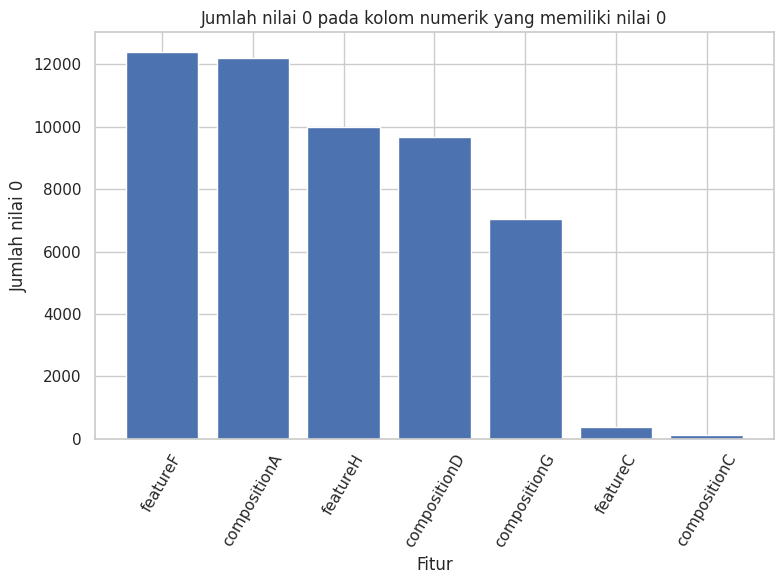

In [ ]:

# Menghapus kolom 'results'
df_train_filtered = df_train.drop(columns=['result'])

# Menghitung jumlah nilai 0 dalam setiap kolom numerik
count_zeros = (df_train_filtered == 0).sum()

# Memfilter hanya kolom yang memiliki nilai 0
count_zeros = count_zeros[count_zeros > 0]

# Mengurutkan dari yang terbesar ke terkecil
count_zeros = count_zeros.sort_values(ascending=False)

# Membuat visualisasi hanya untuk kolom yang memiliki nilai 0
if not count_zeros.empty:
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(count_zeros.index, count_zeros.values)
    ax.set_xlabel('Fitur')
    ax.set_ylabel('Jumlah nilai 0')
    ax.set_title('Jumlah nilai 0 pada kolom numerik yang memiliki nilai 0')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom yang memiliki nilai 0 selain kolom 'results'.")

melakukan checking lebih lanjut terhadap banyak fitur yang memiliki value (0). ditemukan sebanyak 7 fitur memiliki value (0) dengan jumlah yang banyak.
dalam hal ini juga ditemukan kendala untuk mengatasi value (0). kendala tersebut adalah kami tidak mengetahui pasti tentang nilai 0 memang bernilai 0 atau missing value. hal tersebut, dikarenakan kurangnya informasi tentang deskripsi dataset.

In [ ]:
# Memeriksa apakah nama kolom sama di kedua set data
dif_1 = [x for x in df_train.columns if x not in df_test.columns] #
print(f"Kolom yang ada di df_train tetapi tidak ada di df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Kolom yang ada di df_test tetapi tidak ada di df_train: {dif_2}")

Kolom yang ada di df_train tetapi tidak ada di df_test: ['result']

Kolom yang ada di df_test tetapi tidak ada di df_train: []


disini juga dilakukan checking untuk nama kolom yang ada di dataset train dan test sama atau tidak. dilihat dari output, kolom yang tidak sama adalah result, karna data test tidak punya kolom result sedangkan fitur lainnya yang ada di dataset train dan test sudah sama.

In [ ]:
# Jumlah nilai unik per kolom
nu_df = pd.DataFrame([df_train.nunique(),df_test.nunique()]).T
nu_df.columns = ["Train","Test"]
nu_df

,Train,Test
id,13000.0,7000.0
categoryA,167.0,140.0
categoryB,2.0,2.0
categoryC,2212.0,1755.0
categoryD,3.0,3.0
categoryE,25.0,25.0
categoryF,3.0,3.0
featureA,23.0,23.0
featureB,23.0,23.0
featureC,19.0,19.0


Disini kita melihat jumlah nilai unik dalam setiap fitur. di dipastikan tidak ada data duplikat karena id data 13.000 unik sesuai dengan rows data train dan id data test 7000 unik sesuai dengan rows data data test. namun ada beberapa temuan yang perlu dilakukan penanganan.<br>
temuan :
1. Fitur CategoryA memiliki value unik sebanyak 167 pada data train dan 140 pada data test.
2. Fitur CategoryC memiliki value unik sebanyak 2212 pada data train dan 1755 pada data test.
3. Fitur CategoryE Memiliki value unik sebanyak 25 pada data train dan 25 pada data test.
<br>
dari temuan di atas, di putuskan untuk melakukan drop pada ketiga fitur kategorik tersebut di langkah selanjutnya dengan alasan :<br>
a. Fitur Category akan dilakukan one-hot encoding, dengan jumlah value unik yang dimiliki ketiga fitur tersebut akan membuat dataset memiliki kolom yang banyak. dengan fitur yang banyak proses komputasi juga lumayan lama, dan di takutkan jika fitur teralu banyak akan overfitting.<br>
b. fitur antara data train dan test berbeda, banyak nya value di data train dan test yang berbeda akan membuat model yang sudah di latih di data train tidak bisa di testing dengan data test karena fitur data yang berbeda. kalaupun akan dilakukan penanganan, agak kesulitan karna fitur yang lumayan banyak.<br>
c. kesulitan pada proses deployment menggunakan streamlit, kurang efektif jika user menginputkan isi fitur sebanyak fitur yang sudah di latih.



## Cek Missing Value

In [ ]:
# Jumlah missing value tiap kolom
na_df = pd.DataFrame([df_train.isna().sum(), df_test.isna().sum()]).T
na_df.columns = ["Train", "Test"]
na_df

,Train,Test
id,0.0,0.0
categoryA,0.0,0.0
categoryB,0.0,0.0
categoryC,0.0,0.0
categoryD,0.0,0.0
categoryE,0.0,0.0
categoryF,0.0,0.0
featureA,64.0,43.0
featureB,64.0,43.0
featureC,64.0,43.0


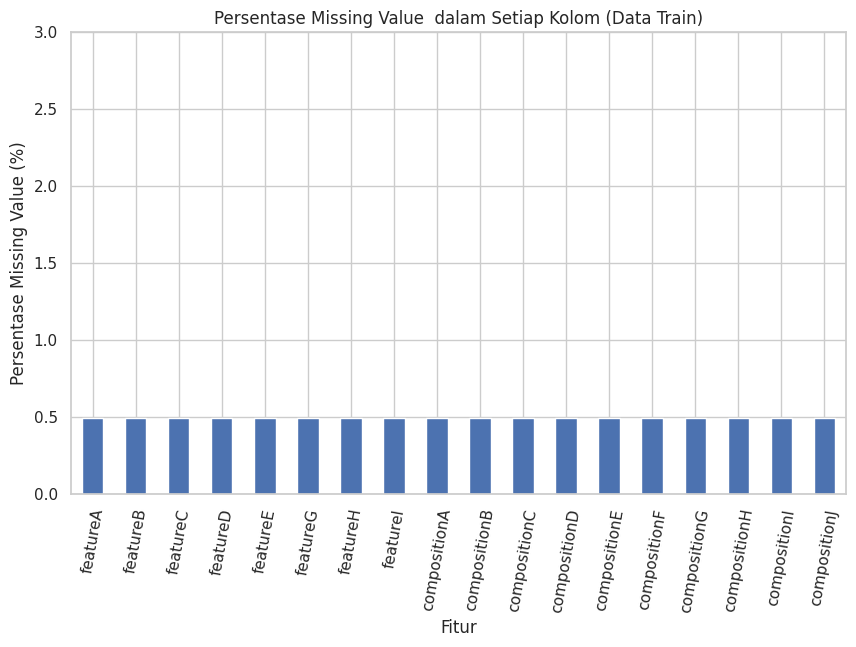

In [ ]:
# Menghitung jumlah nilai yang hilang dalam setiap kolom
missing_values = df_train.isnull().sum()

# Memfilter hanya kolom yang memiliki nilai yang hilang
missing_values = missing_values[missing_values > 0]

# Menghitung persentase nilai yang hilang dalam setiap kolom
total_entries = df_train.shape[0]
percent_missing = (missing_values / total_entries) * 100

# Membuat visualisasi hanya untuk kolom-kolom yang memiliki nilai yang hilang
if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    percent_missing.plot(kind='bar')
    plt.title('Persentase Missing Value  dalam Setiap Kolom (Data Train)')
    plt.xlabel('Fitur')
    plt.ylabel('Persentase Missing Value (%)')
    plt.ylim(0, 3)  # Menetapkan rentang sumbu y dari 0 hingga 3
    plt.xticks(rotation=80)
    plt.show()
else:
    print("Tidak ada nilai yang hilang dalam DataFrame.")

ditemukan missing value pada beberapa fitur numerik, penanganan yang akan dilakukan dengan menginputasi nilai mean dari fitur tesebut pada missing value.

## Distribusi Data

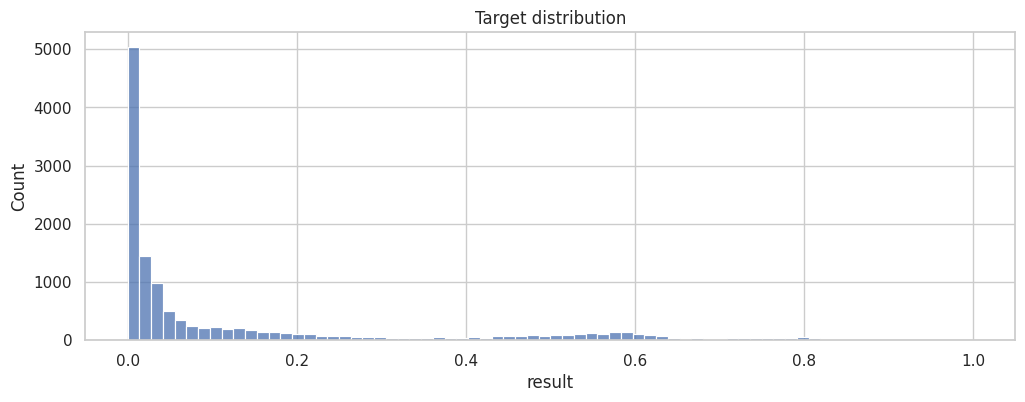

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data=df_train, x="result")
plt.title("Target distribution")
plt.show()

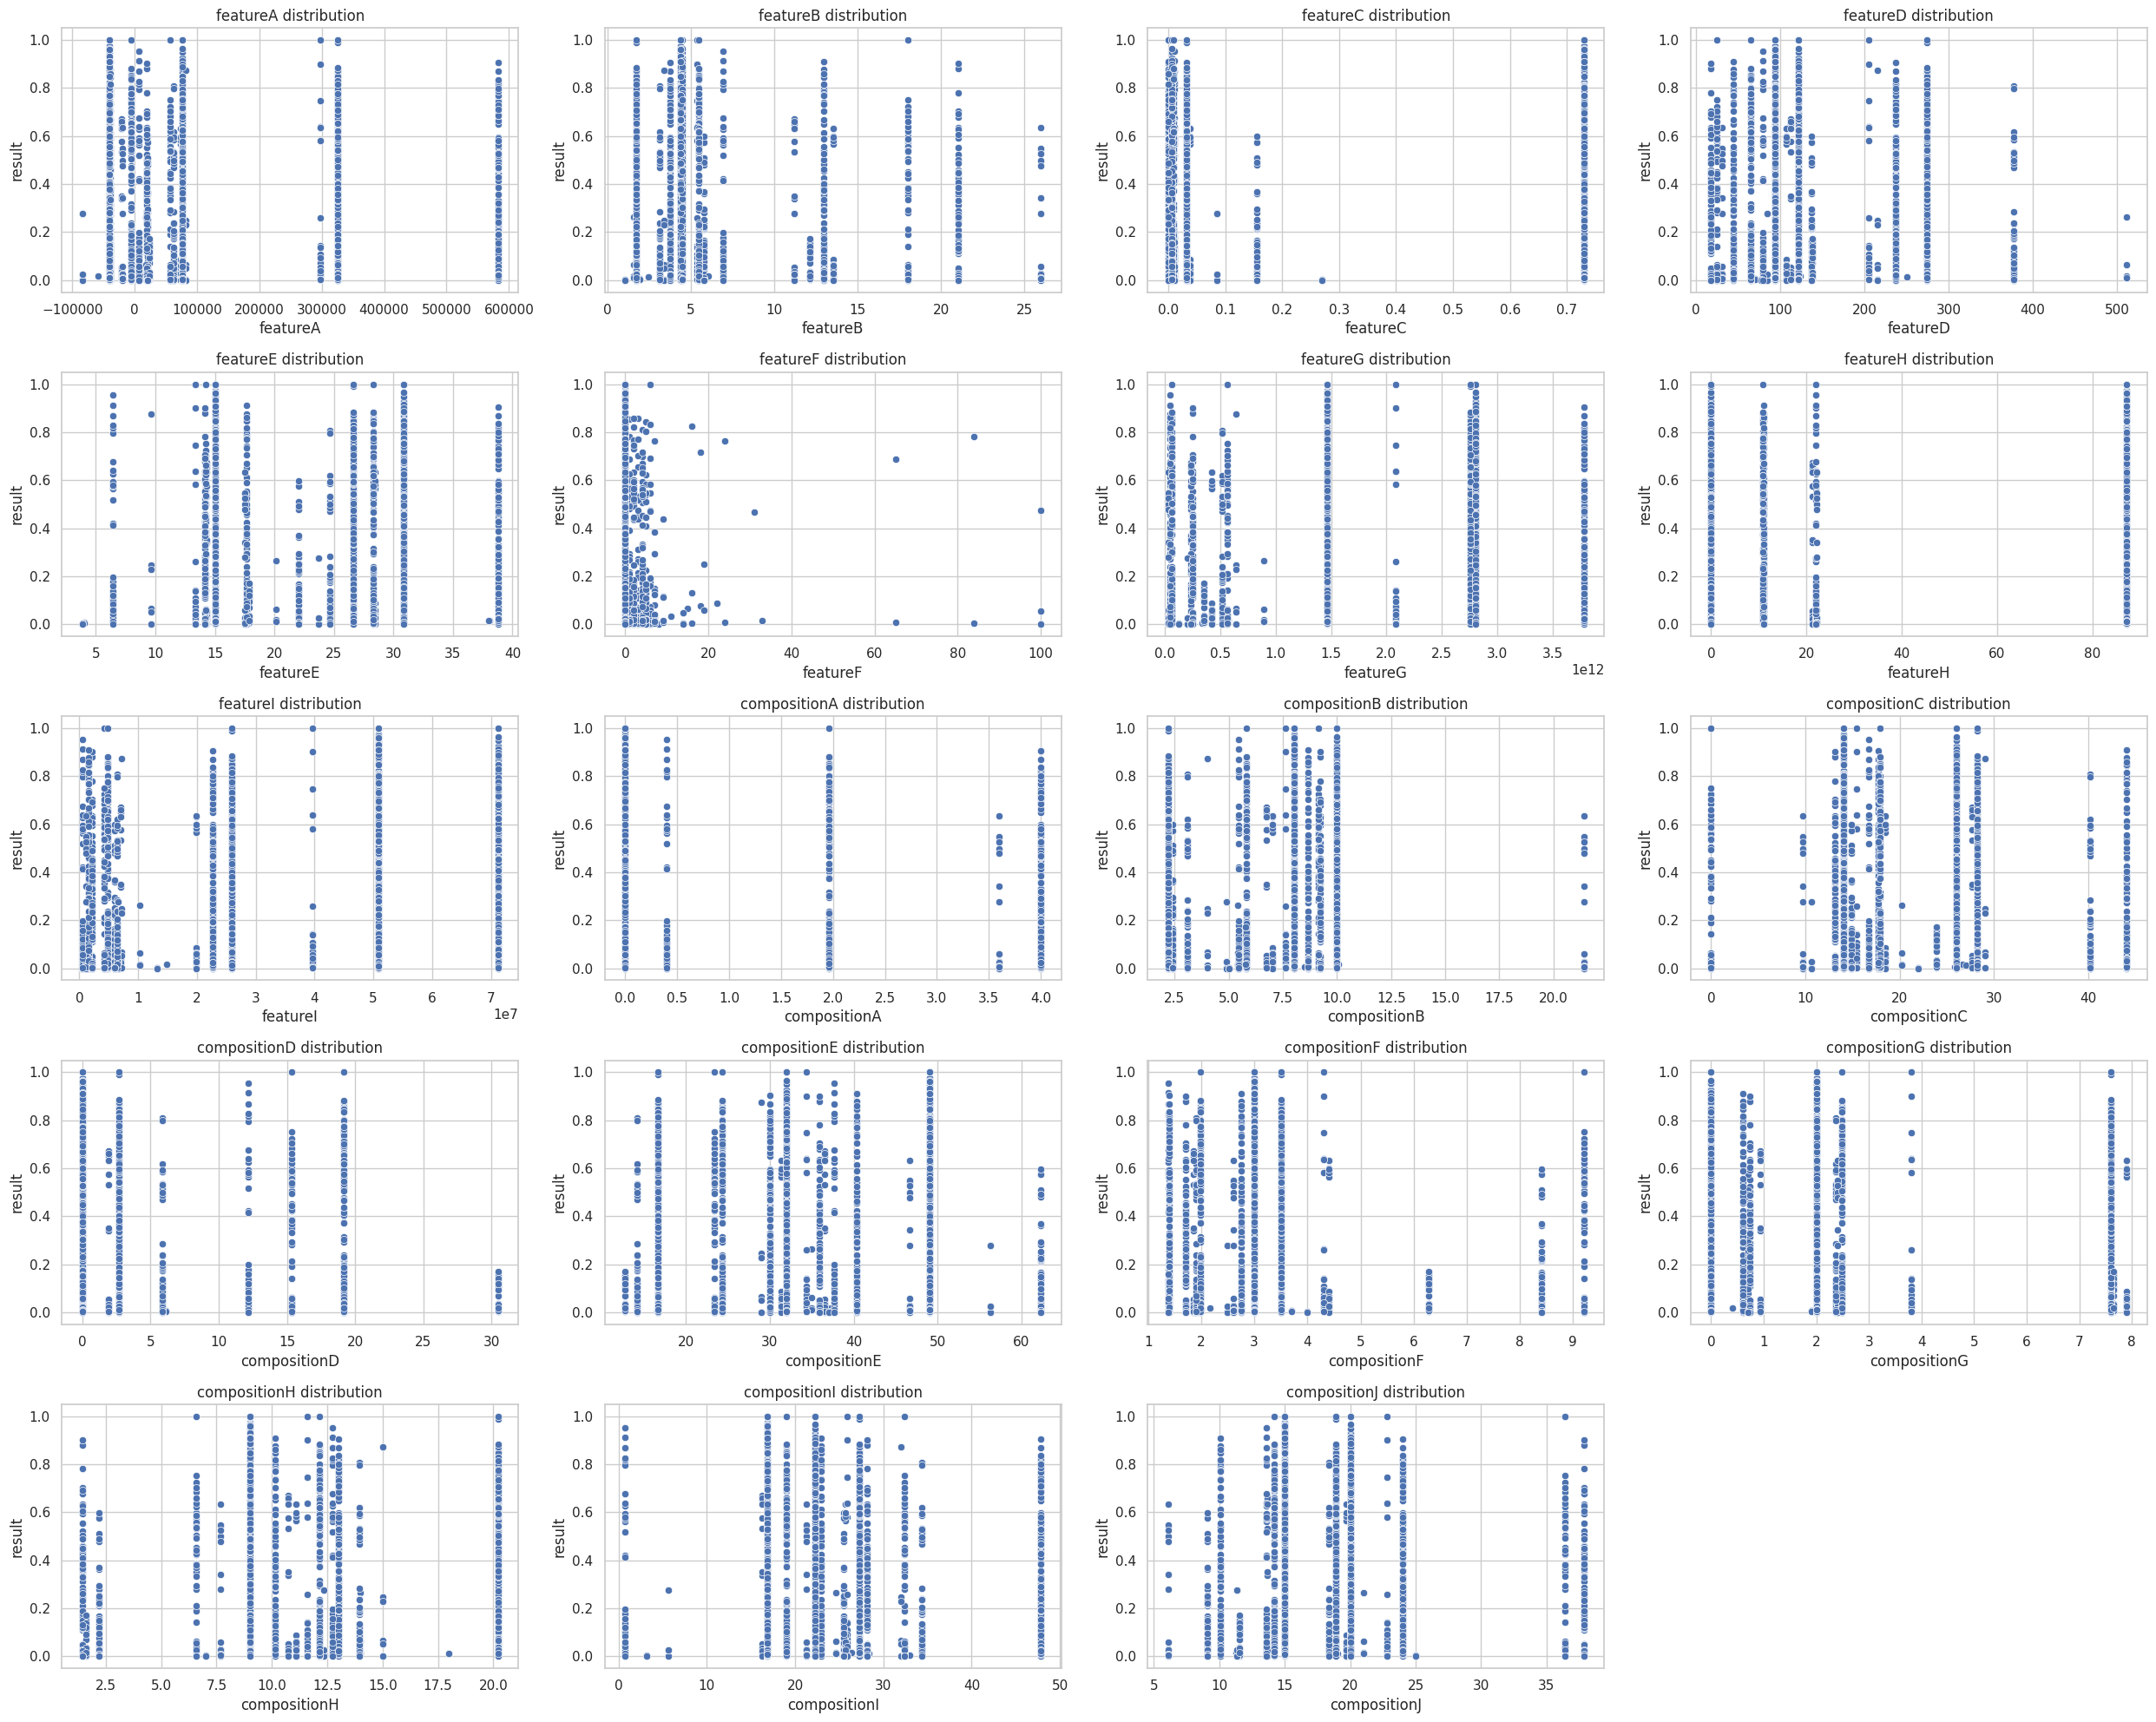

In [ ]:
#kolom numerik
float_cols = [col for (col, d) in zip(df_train.iloc[:,:-1].columns,df_train.iloc[:,:-1].dtypes) if d == "float64"]

# Figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25,20))

for i, ax in enumerate(axes.flat):
    try:
        sns.scatterplot(ax=ax, data=df_train, x=float_cols[i], y="result")
        ax.set_title(f'{float_cols[i]} distribution')
    except:
        ax.set_visible(False)

fig.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Mengidentifikasi kolom-kolom kontinu (float64) kecuali kolom target 'result'
float_cols = [col for col in df_train.select_dtypes(include=['float64']).columns if col != 'result']

# Visualisasi distribusi data
for col in float_cols:
    #plt.figure(figsize=(8, 6))

    # Histogram
    #plt.subplot(1, 2, 1)
    #sns.histplot(df_train[col], kde=True)
    #plt.title(f'Histogram of {col}')

    # Menampilkan plot
    #plt.show()

    # Menghitung dan menampilkan skewness
    skewness = df_train[col].skew()
    print(f'Skewness dari {col}: {skewness:.2f}')
    if skewness > 0:
        print(f'Data untuk {col} memiliki kemiringan ke kanan (positif).\n')
    elif skewness < 0:
        print(f'Data untuk {col} memiliki kemiringan ke kiri (negatif).\n')
    else:
        print(f'Data untuk {col} memiliki distribusi yang simetris.\n')



Skewness dari featureA: 1.31
Data untuk featureA memiliki kemiringan ke kanan (positif).

Skewness dari featureB: 3.80
Data untuk featureB memiliki kemiringan ke kanan (positif).

Skewness dari featureC: 1.80
Data untuk featureC memiliki kemiringan ke kanan (positif).

Skewness dari featureD: 1.00
Data untuk featureD memiliki kemiringan ke kanan (positif).

Skewness dari featureE: -0.89
Data untuk featureE memiliki kemiringan ke kiri (negatif).

Skewness dari featureF: 31.22
Data untuk featureF memiliki kemiringan ke kanan (positif).

Skewness dari featureG: -1.31
Data untuk featureG memiliki kemiringan ke kiri (negatif).

Skewness dari featureH: 1.78
Data untuk featureH memiliki kemiringan ke kanan (positif).

Skewness dari featureI: -0.65
Data untuk featureI memiliki kemiringan ke kiri (negatif).

Skewness dari compositionA: 4.61
Data untuk compositionA memiliki kemiringan ke kanan (positif).

Skewness dari compositionB: -0.80
Data untuk compositionB memiliki kemiringan ke kiri (nega

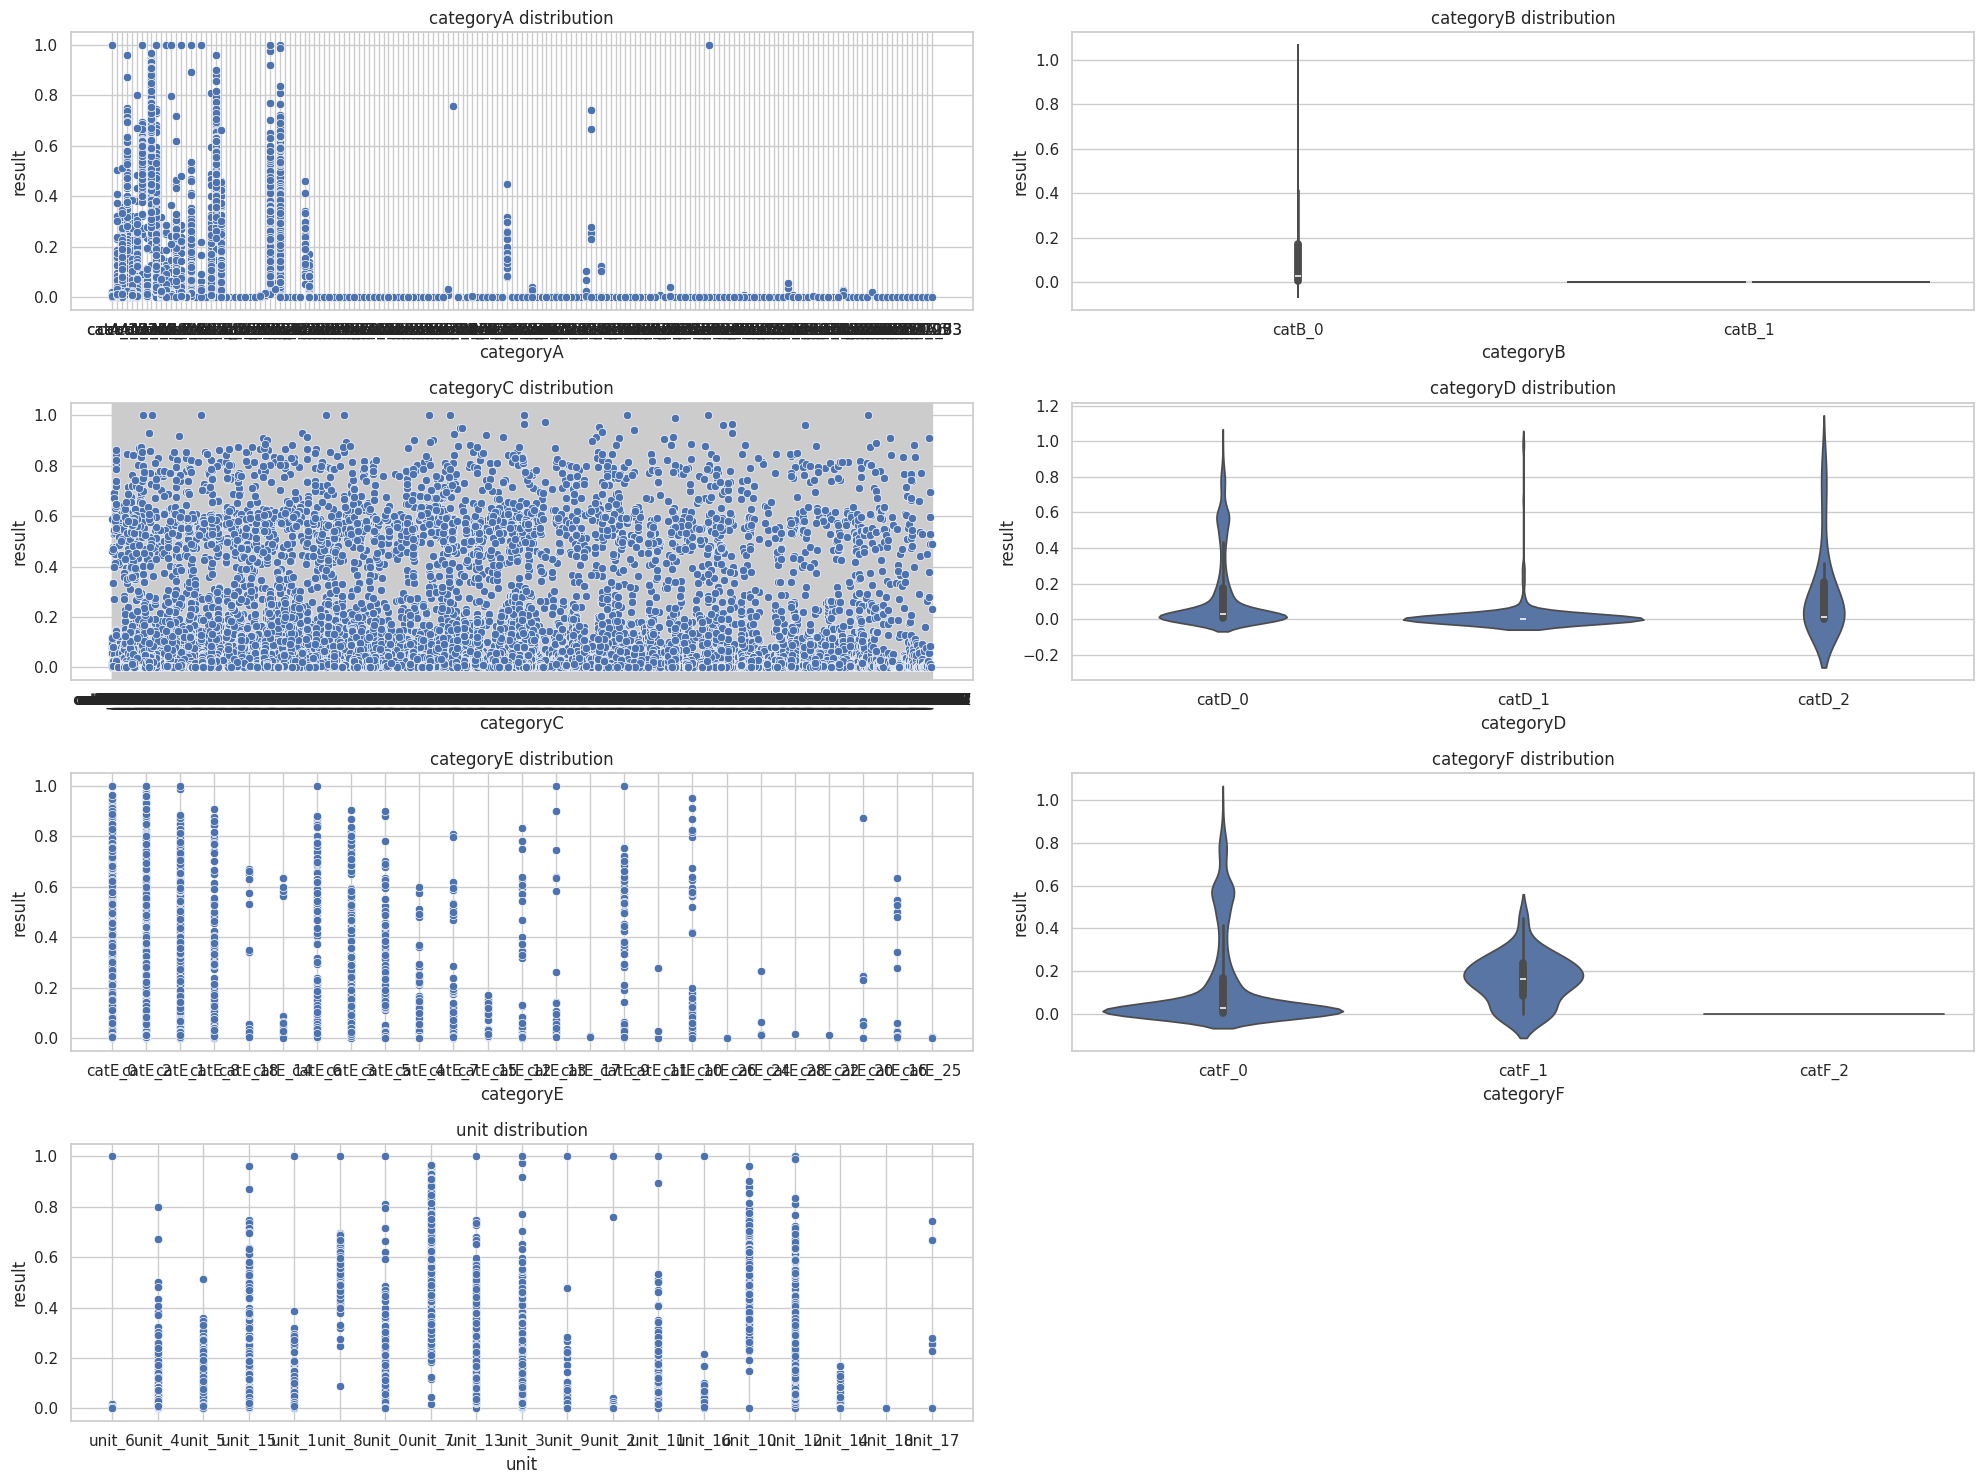

In [ ]:
# kolom kategorikal
cat_cols = [f"category{i}" for i in ["A","B","C","D","E","F"]]+["unit"]

# Figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,15))

for i, ax in enumerate(axes.flat):
    try:
        if i%2==1:
            sns.violinplot(ax=ax, data=df_train, x=cat_cols[i], y="result")
            ax.set_title(f'{cat_cols[i]} distribution')
        else:
            sns.scatterplot(ax=ax, data=df_train, x=cat_cols[i], y="result")
            ax.set_title(f'{cat_cols[i]} distribution')
    except:
        ax.set_visible(False)

# Improves appearance
fig.tight_layout()
plt.legend()
plt.show()

# **FEATURE ENGINEERING**

## Outliers

In [ ]:
def detect_and_replace_outliers_iqr(df):
    # Memilih kolom-kolom numerik dalam dataframe
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    # List untuk menyimpan informasi outliers
    outliers_info = []

    # Loop untuk setiap kolom numerik
    for col in numerical_cols:
        # Lewati kolom target 'result'
        if col == 'result':
            continue

        # Hitung quartile 1 (Q1) dan quartile 3 (Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Hitung Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Hitung batas bawah dan batas atas untuk outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah outliers
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers_percentage = outliers_count / df.shape[0] * 100

        # Simpan informasi tentang outliers
        outliers_info.append({'Kolom': col,
                              'Jumlah_Outliers': outliers_count,
                              'Persentase_Outliers': outliers_percentage})

        # Ganti nilai-nilai outliers dengan NaN
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

    # Mengembalikan dataframe yang sudah dibersihkan dari outliers dan informasi tentang outliers
    return df, pd.DataFrame(outliers_info)

df_train, outliers_info = detect_and_replace_outliers_iqr(df_train)
outliers_info


,Kolom,Jumlah_Outliers,Persentase_Outliers
0,featureA,6200,47.692308
1,featureB,4387,33.746154
2,featureC,2401,18.469231
3,featureD,6112,47.015385
4,featureE,2578,19.830769
5,featureF,590,4.538462
6,featureG,0,0.000000
7,featureH,2930,22.538462
8,featureI,0,0.000000
9,compositionA,715,5.500000


In [ ]:
df_train.describe()

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,result
count,6736.000000,8549.000000,10535.000000,6824.000000,10358.000000,12410.0,1.293600e+04,10006.0,1.293600e+04,12221.0,12910.000000,12520.000000,12313.000000,6899.000000,8556.0,10253.000000,9793.000000,12451.000000,9220.000000,13000.000000
mean,75178.377468,4.434526,0.013120,122.962573,29.385301,0.0,2.335365e+12,0.0,5.020210e+07,0.0,7.680654,23.419642,0.574226,31.892912,3.0,0.564308,9.346994,22.774439,19.664080,0.144223
std,3172.841060,0.040756,0.012372,3.509921,3.399587,0.0,8.937298e+11,0.0,2.412360e+07,0.0,3.152472,5.399950,1.103476,0.507549,0.0,0.901610,1.185691,3.729641,0.519767,0.224062
min,56744.750000,4.363288,0.000000,107.127967,17.510663,0.0,2.887150e+10,0.0,5.300380e+05,0.0,2.200000,9.700000,0.000000,29.000000,3.0,0.000000,6.580000,16.230000,18.380000,0.000000
25%,75808.375000,4.457840,0.005718,122.299437,26.637511,0.0,1.464509e+12,0.0,2.586796e+07,0.0,5.830000,17.930000,0.000000,32.000000,3.0,0.000000,9.000000,22.260000,18.900000,0.003875
50%,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,5.094169e+07,0.0,10.000000,26.000000,0.000000,32.000000,3.0,0.000000,9.000000,22.260000,20.000000,0.027909
75%,75808.375000,4.457840,0.032407,122.299437,30.831906,0.0,2.806036e+12,0.0,7.117635e+07,0.0,10.000000,26.000000,0.000000,32.000000,3.0,0.930000,9.000000,27.250000,20.000000,0.168678
max,82158.250000,4.457840,0.038153,137.976566,38.767234,0.0,3.781699e+12,0.0,7.117635e+07,0.0,10.070000,29.000000,2.700000,35.000000,3.0,3.800000,15.000000,34.303000,21.000000,1.000000


In [ ]:
df_train.isna().sum()

id                 0
categoryA          0
categoryB          0
categoryC          0
categoryD          0
categoryE          0
categoryF          0
featureA        6264
featureB        4451
featureC        2465
featureD        6176
featureE        2642
featureF         590
featureG          64
featureH        2994
featureI          64
compositionA     779
compositionB      90
compositionC     480
compositionD     687
compositionE    6101
compositionF    4444
compositionG    2747
compositionH    3207
compositionI     549
compositionJ    3780
unit               0
result             0
dtype: int64

## Handling Missing Value

In [ ]:
#train
# List kolom numerik
numeric_columns = df_train.select_dtypes(include='number').columns

# Mengisi nilai yang hilang pada kolom numerik dengan mean
for col in numeric_columns:
    df_train[col].fillna(df_train[col].mean(), inplace=True)

In [ ]:
#test
# List kolom numerik
numeric_columns = df_test.select_dtypes(include='number').columns

# Mengisi nilai yang hilang pada kolom numerik dengan mean
for col in numeric_columns:
    df_test[col].fillna(df_test[col].mean(), inplace=True)

Melakukan handling missing value dengan menginputkan nilai mean dari fitur tersebut.

In [ ]:
df_train.isna().sum()

id              0
categoryA       0
categoryB       0
categoryC       0
categoryD       0
categoryE       0
categoryF       0
featureA        0
featureB        0
featureC        0
featureD        0
featureE        0
featureF        0
featureG        0
featureH        0
featureI        0
compositionA    0
compositionB    0
compositionC    0
compositionD    0
compositionE    0
compositionF    0
compositionG    0
compositionH    0
compositionI    0
compositionJ    0
unit            0
result          0
dtype: int64

Checking apakah handling missing value sudah berhasil atau tidak. dari output diatas missing value sudah di atasi


## DROP KOLOM

In [ ]:
#Drop kolom 'categoryA' sampai 'categoryF' di df_train
df_cleaned = df_train.drop(columns=['id','categoryA', 'categoryC','categoryE'])
#Drop kolom 'categoryA' sampai 'categoryF' di df_test
df_cleaned_test= df_test.drop(columns=['id','categoryA', 'categoryC','categoryE'])

Melakukan drop pada fitur categoryA, C dan E sesuai dengan pertimbangan analisis sebelumnya

In [ ]:
df_cleaned

,categoryB,categoryD,categoryF,featureA,featureB,featureC,featureD,featureE,featureF,featureG,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,catB_0,catD_0,catF_0,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,...,26.00,0.0,32.000000,3.0,0.00,9.000000,22.26,20.00000,unit_6,0.000458
1,catB_0,catD_0,catF_0,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,...,26.00,0.0,32.000000,3.0,0.00,9.000000,22.26,20.00000,unit_6,0.000335
2,catB_0,catD_0,catF_0,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,...,26.00,0.0,32.000000,3.0,0.00,9.000000,22.26,20.00000,unit_4,0.054072
3,catB_0,catD_0,catF_0,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,...,26.00,0.0,32.000000,3.0,0.00,9.000000,22.26,20.00000,unit_5,0.061143
4,catB_0,catD_0,catF_0,75178.377468,4.363288,0.013120,122.962573,29.385301,0.0,1.464509e+12,...,14.00,0.0,31.892912,3.0,2.00,9.000000,16.84,19.66408,unit_15,0.015439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,catB_0,catD_0,catF_0,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,...,26.00,0.0,32.000000,3.0,0.00,9.000000,22.26,20.00000,unit_1,0.008260
12996,catB_0,catD_0,catF_0,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,...,26.00,0.0,32.000000,3.0,0.00,9.000000,22.26,20.00000,unit_9,0.002395
12997,catB_0,catD_0,catF_1,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,...,26.00,0.0,32.000000,3.0,0.00,9.000000,22.26,20.00000,unit_12,0.150982
12998,catB_0,catD_0,catF_0,75178.377468,4.434526,0.000387,122.962573,29.385301,0.0,2.526922e+11,...,13.13,0.0,31.892912,3.0,0.73,9.346994,28.12,19.66408,unit_8,0.488908


df_cleaned merupakan variabel yang berisi dataset yang sudah bersih dan siap dilakukan one-hot encoding pada data kategorik

## One-hot Encoding

In [ ]:
#data train
# Kolom yang perlu di one-hot encoding
kolom_kategorikal = ['categoryB', 'categoryD', 'categoryF', 'unit']
# Melakukan one-hot encoding untuk kolom kategori yang dipilih
df_encoded= pd.get_dummies(df_cleaned, columns=kolom_kategorikal, dummy_na=False, dtype=int)

In [ ]:
#data test
# Kolom yang perlu di one-hot encoding
kolom_kategorikal = ['categoryB', 'categoryD', 'categoryF', 'unit']
# Melakukan one-hot encoding untuk kolom kategori yang dipilih
df_test_encoded= pd.get_dummies(df_cleaned_test, columns=kolom_kategorikal, dummy_na=False, dtype=int)

In [ ]:
df_encoded

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,...,unit_unit_17,unit_unit_18,unit_unit_2,unit_unit_3,unit_unit_4,unit_unit_5,unit_unit_6,unit_unit_7,unit_unit_8,unit_unit_9
0,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,71176346.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,71176346.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,71176346.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,71176346.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,75178.377468,4.363288,0.013120,122.962573,29.385301,0.0,1.464509e+12,0.0,50941692.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,71176346.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12996,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,71176346.0,0.0,...,0,0,0,0,0,0,0,0,0,1
12997,75808.375000,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.0,71176346.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12998,75178.377468,4.434526,0.000387,122.962573,29.385301,0.0,2.526922e+11,0.0,2147000.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
df_encoded.describe()

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,...,unit_unit_17,unit_unit_18,unit_unit_2,unit_unit_3,unit_unit_4,unit_unit_5,unit_unit_6,unit_unit_7,unit_unit_8,unit_unit_9
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.0,1.300000e+04,13000.0,1.300000e+04,13000.0,...,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,75178.377468,4.434526,0.013120,122.962573,29.385301,0.0,2.335365e+12,0.0,5.020210e+07,0.0,...,0.000538,0.000308,0.077231,0.076385,0.074000,0.064615,0.065615,0.060538,0.056923,0.051385
std,2283.821438,0.033050,0.011138,2.542904,3.034507,0.0,8.915270e+11,0.0,2.406414e+07,0.0,...,0.023199,0.017539,0.266968,0.265623,0.261781,0.245855,0.247618,0.238491,0.231704,0.220789
min,56744.750000,4.363288,0.000000,107.127967,17.510663,0.0,2.887150e+10,0.0,5.300380e+05,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75178.377468,4.434526,0.005718,122.299437,26.637511,0.0,1.464509e+12,0.0,2.586796e+07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75178.377468,4.434526,0.005718,122.962573,30.831906,0.0,2.806036e+12,0.0,5.094169e+07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75808.375000,4.457840,0.013120,122.962573,30.831906,0.0,2.806036e+12,0.0,7.117635e+07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82158.250000,4.457840,0.038153,137.976566,38.767234,0.0,3.781699e+12,0.0,7.117635e+07,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Jumlah nilai unik per kolom setelah pembersihan outlier, encoding
df_encoded.nunique()

featureA                6
featureB                3
featureC               16
featureD                7
featureE               15
featureF                1
featureG               24
featureH                1
featureI               24
compositionA            1
compositionB           21
compositionC           21
compositionD            4
compositionE            7
compositionF            1
compositionG           13
compositionH           18
compositionI           20
compositionJ            7
result              10337
categoryB_catB_0        2
categoryB_catB_1        2
categoryD_catD_0        2
categoryD_catD_1        2
categoryD_catD_2        2
categoryF_catF_0        2
categoryF_catF_1        2
categoryF_catF_2        2
unit_unit_0             2
unit_unit_1             2
unit_unit_10            2
unit_unit_11            2
unit_unit_12            2
unit_unit_13            2
unit_unit_14            2
unit_unit_15            2
unit_unit_16            2
unit_unit_17            2
unit_unit_18

In [ ]:
df_encoded.dtypes

featureA            float64
featureB            float64
featureC            float64
featureD            float64
featureE            float64
featureF            float64
featureG            float64
featureH            float64
featureI            float64
compositionA        float64
compositionB        float64
compositionC        float64
compositionD        float64
compositionE        float64
compositionF        float64
compositionG        float64
compositionH        float64
compositionI        float64
compositionJ        float64
result              float64
categoryB_catB_0      int64
categoryB_catB_1      int64
categoryD_catD_0      int64
categoryD_catD_1      int64
categoryD_catD_2      int64
categoryF_catF_0      int64
categoryF_catF_1      int64
categoryF_catF_2      int64
unit_unit_0           int64
unit_unit_1           int64
unit_unit_10          int64
unit_unit_11          int64
unit_unit_12          int64
unit_unit_13          int64
unit_unit_14          int64
unit_unit_15        

Data kategorik yang sudah di one-hot encoding.<br>

temuan :
1. Kolom yang sebelumnya 28 kolom (27 fitur dan 1 target) berubah menjadi 47 kolom (46 Fitur dan 1 Target).
2. Tipe data sudah menjadi integer bukan object lagi.

## KORELASI

In [ ]:
# Menghitung matriks korelasi
corre = df_encoded.drop('result', axis=1).corrwith(df_encoded['result'])
cor = pd.DataFrame(corre, columns=['Korelasi'])
cor

,Korelasi
featureA,0.003019
featureB,0.010203
featureC,0.032359
featureD,-0.075891
featureE,0.021229
featureF,NaN
featureG,0.017901
featureH,NaN
featureI,-0.024654
compositionA,NaN


In [ ]:
#cek korelasi apakah ada yang nan atau tidak
cor_nan = cor[cor['Korelasi'].isna()]
cor_nan

,Korelasi
featureF,NaN
featureH,NaN
compositionA,NaN
compositionF,NaN


In [ ]:
#Drop kolom Numerik di df_train yang tidak memiliki korelasi
df_encoded = df_encoded.drop(columns=['featureF','featureH','compositionA','compositionF'])
#Drop kolom Numerik di df_test yang tidak memiliki korelasi
df_test_encoded= df_test_encoded.drop(columns=['featureF','featureH','compositionA','compositionF'])

analisis untuk Korelasi Nan pada penelitian ini bisa terjadi karena pada fitur
'featureF','featureH','compositionA','compositionF'memiliki 1 variasi value.<br>
<br>
sebelum pembersihan outliers:<br>
value 0 pada featureF dan compositionA menyentuh angka 93% dari keseluruhan data, sedangkan pada featureH sebanyak 73% valuenya 0.
karena valuenya sangat banyak di angka 0 maka angka selain 0 dianggap outlier sehingga pada penanganan outlier diatas, data tersebut di hapus menjadi missing value dan ketika melakukan handling missing value dengan inputasi mean dari masing-masing kolom, meannya menjadi 0 dan semua value berubah menjadi 0 sehingga ketika dilihat korelasi dengan result menjadi NaN.
<br>
<br>untuk kolom compositionF sebelum pembersihan outliers memiliki 20 value unik namun setelah pembersihan outlier hanya memiliki 1 value unik (3.0). sehingga karena kurangnya variasi data korelasi fitur compositionF menjadi NaN

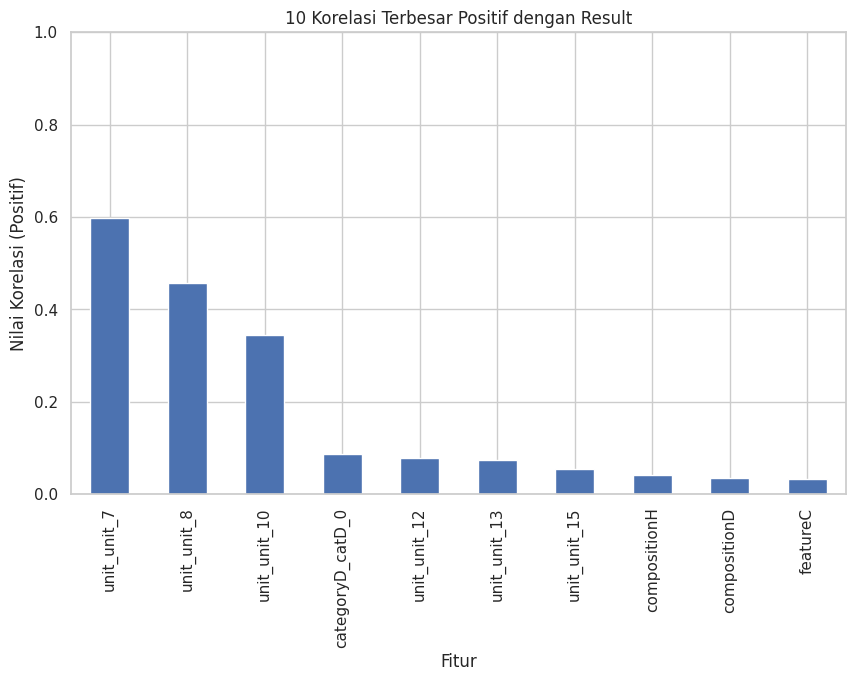

In [ ]:
# Mengambil korelasi positif
positive_cor = cor[cor['Korelasi'] > 0]

# Menyortir DataFrame berdasarkan nilai korelasi dari yang terbesar dan mengambil 10 terbesar
cor_sorted = positive_cor.sort_values(by='Korelasi', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
cor_sorted['Korelasi'].plot(kind='bar')
plt.title('10 Korelasi Terbesar Positif dengan Result')
plt.xlabel('Fitur')
plt.ylabel('Nilai Korelasi (Positif)')
plt.ylim(0, 1)  # Menetapkan rentang sumbu y dari 0 hingga 1
plt.show()

Temuan :<br>

Korelasi postif yang tertinggi terdapat pada fitur unit. padahal fitur unit merupakan fitur kategorik sebelumnya.



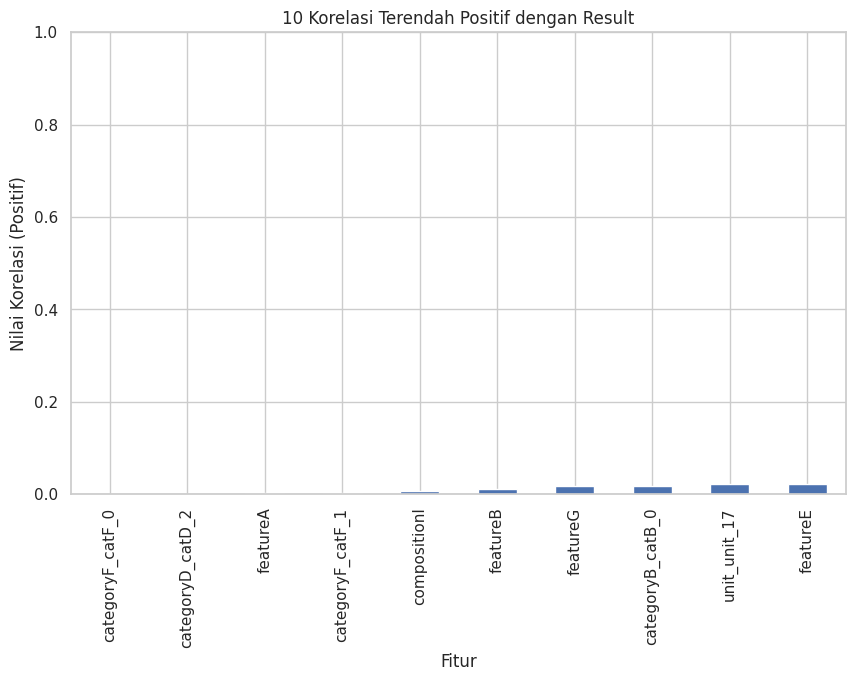

In [ ]:
# Mengambil korelasi positif
positive_cor = cor[cor['Korelasi'] > 0]

# Menyortir DataFrame berdasarkan nilai korelasi dan mengambil 10 terendah
cor_sorted = positive_cor.sort_values(by='Korelasi').head(10)

# Bar plot
plt.figure(figsize=(10, 6))
cor_sorted['Korelasi'].plot(kind='bar')
plt.title('10 Korelasi Terendah Positif dengan Result')
plt.xlabel('Fitur')
plt.ylabel('Nilai Korelasi (Positif)')
plt.ylim(0, 1)  # Menetapkan rentang sumbu y dari 0 hingga 1
plt.show()

beberapa fitur numerik yang memang bertipe data numerik dari sebelumnya ditemukan memiliki korelasi rendah dengan result

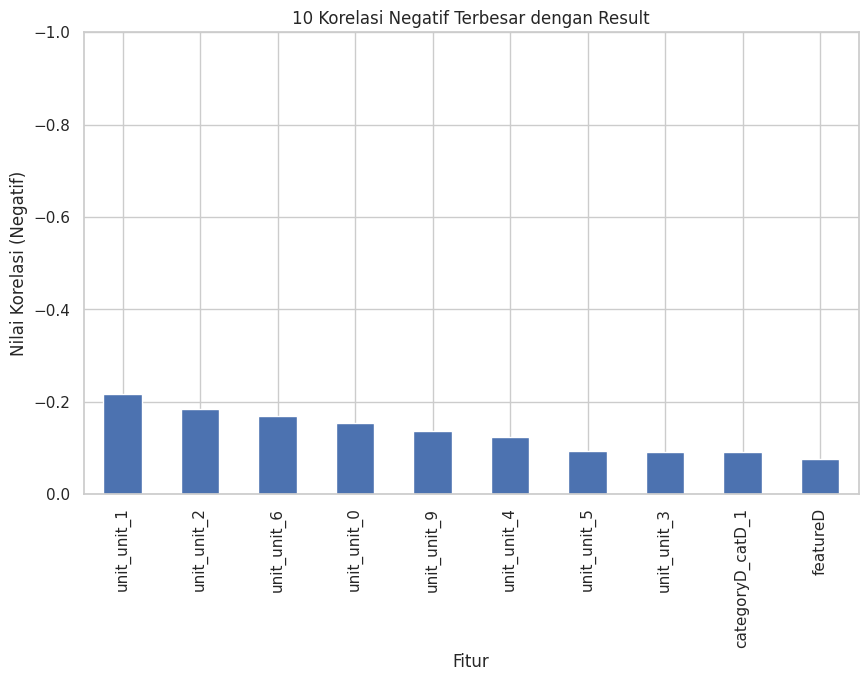

In [ ]:
# Memilih hanya korelasi yang negatif
neg_cor = cor[cor['Korelasi'] < 0]

# Mengurutkan berdasarkan nilai korelasi (tetap negatif), lalu memilih 10 terbesar
cor_sorted_neg = neg_cor['Korelasi'].sort_values().head(10)

# Bar plot
plt.figure(figsize=(10, 6))
cor_sorted_neg.plot(kind='bar')
plt.title('10 Korelasi Negatif Terbesar dengan Result')
plt.xlabel('Fitur')
plt.ylabel('Nilai Korelasi (Negatif)')
plt.ylim(0, -1)  # Menetapkan rentang sumbu y dari 0 hingga -1
plt.show()

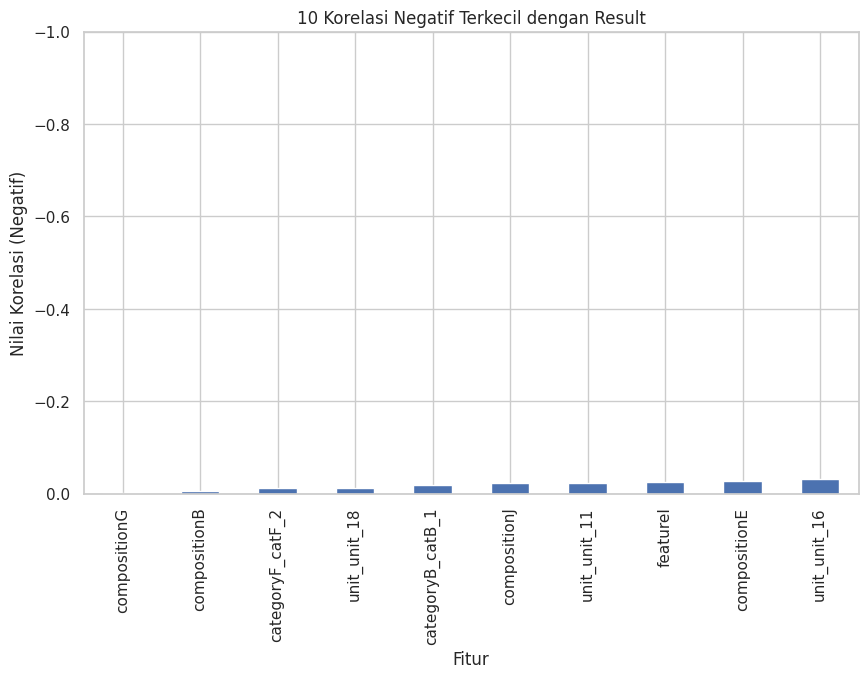

In [ ]:
# Memilih hanya korelasi yang negatif
neg_cor1 = cor[cor['Korelasi'] < 0]

# Mengurutkan berdasarkan nilai korelasi negatif, lalu memilih 10 terkecil
cor_sorted_neg1 = neg_cor1['Korelasi'].sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
cor_sorted_neg1.plot(kind='bar')
plt.title('10 Korelasi Negatif Terkecil dengan Result')
plt.xlabel('Fitur')
plt.ylabel('Nilai Korelasi (Negatif)')
plt.ylim(0, -1)
plt.show()

## SPLITTING DATA

In [ ]:
# Labels
y = df_encoded['result']
# Features
X = df_encoded.drop('result', axis=1)

X_test = df_test_encoded

In [ ]:
# Split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Print feature matrix sizes
print("X_train shape:", X_train.shape)
print("X_val shape:", X_valid.shape)

X_train shape: (10400, 42)
X_val shape: (2600, 42)


Splitting Dataset menjadi data train dan data validation dengan pembagian 80% data train dan 20% data validation

## NORMALISASI

In [ ]:
# Normalisasi dataframe ke dalam rentang 0-1
norm = StandardScaler()
X_train = norm.fit_transform(X_train)
X_valid = norm.transform(X_valid)

In [ ]:
#normaliasi test
X_test=norm.transform(df_test_encoded)

Normalisasi menggunakan standard scaller

# **MODELLING**

In [ ]:
# Mendefinisikan model regresi linear
linear_reg = LinearRegression()

# Mendefinisikan parameter yang akan diuji
param_grid = {
    'fit_intercept': [True, False],
}

# Membuat objek GridSearchCV
linear_grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Melatih model menggunakan data latih
linear_grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_linear_reg = linear_grid_search.best_estimator_

# Membuat prediksi menggunakan data validasi
y_pred = best_linear_reg.predict(X_valid)

# Evaluasi model
mse_linear = mean_squared_error(y_valid, y_pred)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_valid, y_pred)

print("Best Parameters:", linear_grid_search.best_params_)
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R2:", r2_linear)


Best Parameters: {'fit_intercept': True}
Mean Squared Error: 0.007090737420185276
Root Mean Squared Error: 0.08420651649477774
R2: 0.8673198524518055


In [ ]:
# Mendefinisikan kumpulan nilai alpha yang akan diuji
parameter= {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
}

In [ ]:
# Mendefinisikan model Lasso
lasso_model = Lasso()

# Membuat objek GridSearchCV
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=parameter, cv=5, scoring='neg_mean_squared_error')

# Melatih model menggunakan data latih
lasso_grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_lasso = lasso_grid_search.best_estimator_

# Membuat prediksi menggunakan data validasi
y_pred_lasso = best_lasso.predict(X_valid)

# Evaluasi model
mse_lasso = mean_squared_error(y_valid, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_valid, y_pred_lasso)

print("\nBest Alpha:", lasso_grid_search.best_params_['alpha'])  # Mengambil nilai alpha terbaik
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R2:", r2_lasso)



Best Alpha: 0.001
Mean Squared Error: 0.007210451528158393
Root Mean Squared Error: 0.08491437762922363
R2: 0.8650797912891601


In [ ]:
# Mendefinisikan model Ridge
ridge = Ridge()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=parameter, cv=5, scoring='neg_mean_squared_error')

# Melatih model menggunakan data latih
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_ridge = grid_search.best_estimator_

# Membuat prediksi menggunakan data validasi
y_pred_ridge = best_ridge.predict(X_valid)

# Evaluasi model
mse_ridge = mean_squared_error(y_valid, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_valid, y_pred_ridge)

print("Best Alpha:", best_ridge.alpha)
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R2:", r2_ridge)


Best Alpha: 5
Mean Squared Error: 0.007077503096917643
Root Mean Squared Error: 0.08412789725719788
R2: 0.8675674898779006


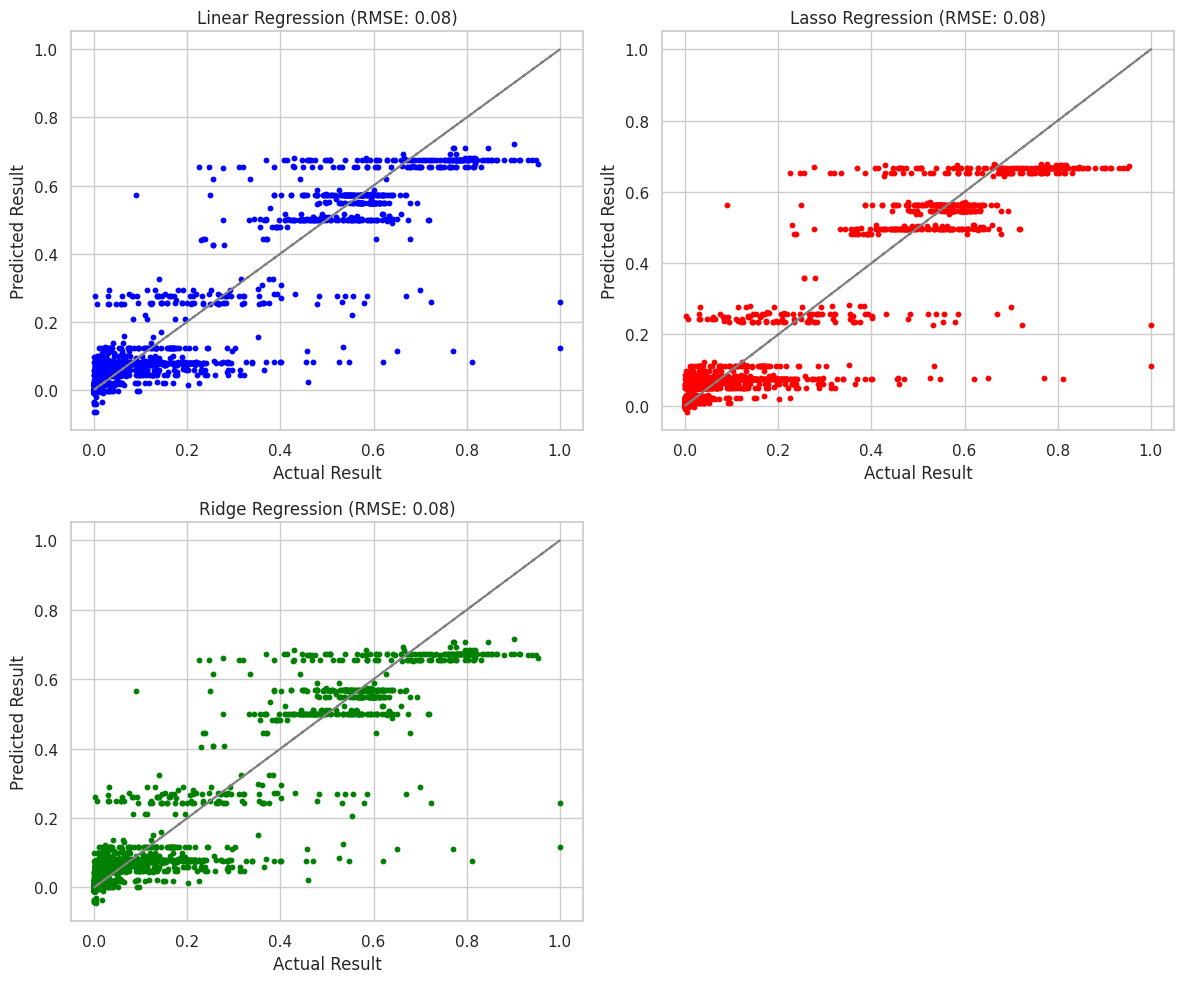

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Predicting charges using each regression model directly on validation features
y_pred = best_linear_reg.predict(X_valid)
y_pred_lasso = best_lasso.predict(X_valid)
y_pred_best_ridge = best_ridge.predict(X_valid)

# Calculating Root Mean Squared Error (RMSE) for each model
rmse_linear = np.sqrt(mean_squared_error(y_valid, y_pred))
rmse_lasso = np.sqrt(mean_squared_error(y_valid, y_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(y_valid, y_pred_best_ridge))

# Creating DataFrames to store actual and predicted values for each model
df_linear = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})
df_lasso = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_lasso})
df_best_ridge = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_best_ridge})

# Plotting y_pred vs y_true for each model in a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Linear Regression
axs[0, 0].scatter(df_linear['Actual'], df_linear['Predicted'], color='blue', s=10)
axs[0, 0].plot(df_linear['Actual'], df_linear['Actual'], '--', color='gray')
axs[0, 0].set_title(f'Linear Regression (RMSE: {rmse_linear:.2f})')
axs[0, 0].set_xlabel('Actual Result')
axs[0, 0].set_ylabel('Predicted Result')

# Plotting for Lasso Regression
axs[0, 1].scatter(df_lasso['Actual'], df_lasso['Predicted'], color='red', s=10)
axs[0, 1].plot(df_lasso['Actual'], df_lasso['Actual'], '--', color='gray')
axs[0, 1].set_title(f'Lasso Regression (RMSE: {rmse_lasso:.2f})')
axs[0, 1].set_xlabel('Actual Result')
axs[0, 1].set_ylabel('Predicted Result')

# Plotting for Ridge Regression
axs[1, 0].scatter(df_best_ridge['Actual'], df_best_ridge['Predicted'], color='green', s=10)
axs[1, 0].plot(df_best_ridge['Actual'], df_best_ridge['Actual'], '--', color='gray')
axs[1, 0].set_title(f'Ridge Regression (RMSE: {rmse_ridge:.2f})')
axs[1, 0].set_xlabel('Actual Result')
axs[1, 0].set_ylabel('Predicted Result')

# Remove the empty subplot in the last position
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## PCA

dari ketiga model dilakukan percobaan menggunakan PCA dengan tujuan hasil MSE dan RMSE yang lebih rendah dari model tanpa PCA, selain itu jika menggunakan PCA proses komputasi semakin cepat dan model mampu memprediksi hasil yang tepat.

In [ ]:
# Daftar jumlah komponen PCA yang akan dicoba
komponen = [32, 22, 12, 7]

# Dictionary untuk menyimpan hasil MSE, RMSE, dan R-squared
hasil_linear = {}

# Loop melalui setiap jumlah komponen PCA yang akan dicoba
for n_components in komponen:
    pca_lin = PCA(n_components=n_components)
    X_train_linear_pca = pca_lin.fit_transform(X_train)
    X_valid_linear_pca = pca_lin.transform(X_valid)

    # Menggunakan LinearRegression untuk regresi
    linear_reg.fit(X_train_linear_pca, y_train)

    # Memprediksi target pada data validasi
    y_pred = linear_reg.predict(X_valid_linear_pca)

    # Menghitung MSE, RMSE, dan R-squared
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_valid, y_pred)

    # Menyimpan hasil
    hasil_linear[n_components] = {'MSE': mse, 'RMSE': rmse, 'R2': r_squared}

    # Mencetak hasil
    print(f"PCA with {n_components} components:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R2: {r_squared}")
    print()

# Menampilkan hasil dalam bentuk DataFrame
hasil_linear_df = pd.DataFrame(hasil_linear).T
hasil_linear_df


PCA with 32 components:
  MSE: 0.007139899913003979
  RMSE: 0.08449792845392115
  R2: 0.8663999358881977

PCA with 22 components:
  MSE: 0.009038517268926629
  RMSE: 0.09507111690164699
  R2: 0.8308734714327141

PCA with 12 components:
  MSE: 0.028145190870829992
  RMSE: 0.1677652850587093
  R2: 0.47335405949692544

PCA with 7 components:
  MSE: 0.05181941331993019
  RMSE: 0.22763877815506345
  R2: 0.030367788605890844



,MSE,RMSE,R2
32,0.007140,0.084498,0.866400
22,0.009039,0.095071,0.830873
12,0.028145,0.167765,0.473354
7,0.051819,0.227639,0.030368


In [ ]:
# Daftar jumlah komponen PCA yang akan dicoba
n = [32, 22, 12, 7]

# Dictionary untuk menyimpan hasil MSE, RMSE, dan R-squared
hasil_lasso = {}

# Loop melalui setiap jumlah komponen PCA yang akan dicoba
for n in n:
    # Membuat transformasi PCA
    pca_lasso = PCA(n_components=n)
    X_train_lasso_pca = pca_lasso.fit_transform(X_train)
    X_valid_lasso_pca = pca_lasso.transform(X_valid)

    # Menggunakan Lasso untuk regresi
    best_lasso.fit(X_train_lasso_pca, y_train)

    # Memprediksi target pada data validasi
    y_pred = best_lasso.predict(X_valid_lasso_pca)

    # Menghitung MSE, RMSE, dan R-squared
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_valid, y_pred)

    # Menyimpan hasil
    hasil_lasso[n] = {'MSE': mse, 'RMSE': rmse, 'R2': r_squared}

    # Mencetak hasil
    print(f"PCA with {n} components:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R2: {r_squared}")
    print()

# Menampilkan hasil dalam bentuk DataFrame
hasil_lasso_df = pd.DataFrame(hasil_lasso).T
hasil_lasso_df


PCA with 32 components:
  MSE: 0.0071877497968362795
  RMSE: 0.08478059799763316
  R2: 0.8655045805434968

PCA with 22 components:
  MSE: 0.009013543174785432
  RMSE: 0.09493968177103519
  R2: 0.8313407805853705

PCA with 12 components:
  MSE: 0.02301792386155261
  RMSE: 0.15171659059428078
  R2: 0.5692942280572975

PCA with 7 components:
  MSE: 0.05178534108536844
  RMSE: 0.227563927469554
  R2: 0.031005339940971988



,MSE,RMSE,R2
32,0.007188,0.084781,0.865505
22,0.009014,0.094940,0.831341
12,0.023018,0.151717,0.569294
7,0.051785,0.227564,0.031005


In [ ]:
from sklearn.decomposition import PCA

# Daftar jumlah komponen PCA yang akan dicoba
n_components_list = [32, 22, 12, 7]

# Dictionary untuk menyimpan hasil MSE, RMSE, dan R-squared
results = {}

for n_components in n_components_list:
    # Membuat transformasi PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_valid_pca = pca.transform(X_valid)

    best_ridge.fit(X_train_pca, y_train)

    # Memprediksi target pada data uji
    y_pred = best_ridge.predict(X_valid_pca)

    # Menghitung MSE, RMSE, dan R-squared
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_valid, y_pred)

    # Menyimpan hasil
    results[n_components] = {'MSE': mse, 'RMSE': rmse, 'R2': r_squared}

    # Mencetak hasil
    print(f"PCA with {n_components} components:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R2: {r_squared}")
    print()

# Menampilkan hasil dalam bentuk DataFrame
results_df = pd.DataFrame(results).T
results_df


PCA with 32 components:
  MSE: 0.007140673068967166
  RMSE: 0.08450250332958881
  R2: 0.8663854687825647

PCA with 22 components:
  MSE: 0.009039209141015022
  RMSE: 0.09507475554012759
  R2: 0.8308605252911024

PCA with 12 components:
  MSE: 0.032519318071478516
  RMSE: 0.18033113450394114
  R2: 0.3915064591719577

PCA with 7 components:
  MSE: 0.051281243068048266
  RMSE: 0.22645362233368727
  R2: 0.04043789897586081



,MSE,RMSE,R2
32,0.007141,0.084503,0.866385
22,0.009039,0.095075,0.830861
12,0.032519,0.180331,0.391506
7,0.051281,0.226454,0.040438


# **EVALUASI**

In [ ]:
hasil = {
    "Model": ["Linear", "Lasso", "Ridge"],
    "Best Parameters": [linear_grid_search.best_params_, {"alpha": best_lasso.alpha}, {"alpha": best_ridge.alpha}],
    "MSE": [mse_linear, mse_lasso, mse_ridge],
    "RMSE": [rmse_linear, rmse_lasso, rmse_ridge],
    "R2": [r2_linear, r2_lasso, r2_ridge]
}

df_hasil = pd.DataFrame(hasil)
print('\n--- Evaluasi Model ---\n')
df_hasil


--- Evaluasi Model ---



,Model,Best Parameters,MSE,RMSE,R2
0,Linear,{'fit_intercept': True},0.007091,0.084207,0.867320
1,Lasso,{'alpha': 0.001},0.007210,0.084914,0.865080
2,Ridge,{'alpha': 5},0.007078,0.084128,0.867567


dari hasil tuning parameter didaptkan model terbaik : RIDGE dengan alpha 5 yang menghasilkan nilai MSE dan RMSE paling rendah dari ketiga model yang di bandingkan.

In [ ]:
print('\n--- Evaluasi Best Model Ridge dengan PCA ---\n')
results_df


--- Evaluasi Best Model Ridge dengan PCA ---



,MSE,RMSE,R2
32,0.007141,0.084503,0.866385
22,0.009039,0.095075,0.830861
12,0.032519,0.180331,0.391506
7,0.051281,0.226454,0.040438


dari hasil percobaan model ridge dengan PCA di dapatkan hasil terbaik dengan komponen sebanyak 32 yang menghasilkan MSE dan RMSE terendah. namun jika di bandingkan dengan model ridge tanpa PCA, MSE dan RMSE hasil PCA masih lebih bagus hasil MSE dan RMSE tanpa PCA.



## Cek Overfitting

In [ ]:
# Ridge
ridge_model_best = Ridge(alpha=best_ridge.alpha)

# Melatih model Ridge menggunakan data latih
ridge_model_best.fit(X_train, y_train)

# Memprediksi target pada data latih dan data validasi menggunakan model Ridge yang telah dilatih
y_pred_train = ridge_model_best.predict(X_train)
y_pred_valid = ridge_model_best.predict(X_valid)

# Menghitung MSE (Mean Squared Error) untuk data latih dan data validasi
mse_train = mean_squared_error(y_train, y_pred_train)
mse_valid = mean_squared_error(y_valid, y_pred_valid)

# Menghitung RMSE (Root Mean Squared Error) untuk data latih dan data validasi
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

# Menghitung R2
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_valid = r2_score(y_valid, y_pred_valid)

# Menampilkan hasil
print('-----------CEK OVERFITTING--------------\n')

data = {
    "Data": ["Train", "Validation"],
    "MSE": [mse_train, mse_valid],
    "RMSE": [rmse_train, rmse_valid],
    "R2": [r_squared_train, r_squared_valid]
}

dt_of = pd.DataFrame(data)
dt_of


-----------CEK OVERFITTING--------------



,Data,MSE,RMSE,R2
0,Train,0.008557,0.092502,0.826718
1,Validation,0.007078,0.084128,0.867567


di lihat dari hasil MSE dan RMSE data train dan validation, model yang telah di buat (tanpa Menggunakan PCA) tidak terjadi overfitting




## Kesimpulan evaluasi


1. MSE dan RMSE dari model RIDGE tanpa PCA lebih rendah sehingga menunjukkan kinerja model RIDGE tanpa PCA lebih bagus dibandingkan dengan model RIDGE dengan PCA.
2. setelah di cek MSE dan RMSE data train dan data validation, model RIDGE tanpa PCA tidak terjadi overfitting.
3. sehingga dengan pertimbangan diatas, maka model RIDGE yang akan digunakan adalah model RIDGE tanpa PCA.

## SAVE MODEL

In [ ]:
import pickle
# Simpan moesin normalisasi
with open('skala.pkl', 'wb') as f:
    pickle.dump(norm, f)
# Simpan model Ridge Regression
with open('rid.pkl', 'wb') as file:
    pickle.dump(ridge_model_best, file)


Mengapa mmodel normalisasi di simpan juga?
karna model normalisasi akan digunakan untuk normalisasi di streamlit, hal ini untuk memastikan mesin yang dipakaui sama antara data train dan data testing nantinya. sehingga diharapkan hasil prediksi akurat.

# **TESTING**

Testing di lakukan dengan menggunakan data test.csv

In [ ]:
# Memuat model Ridge Regression
with open('rid.pkl', 'rb') as file:
    ridge_mod = pickle.load(file)

In [ ]:
# Melakukan prediksi menggunakan model yang telah dimuat
y_pred_test = ridge_mod.predict(X_test)

# Membuat DataFrame dari hasil prediksi
df_pred = pd.DataFrame({'Results': y_pred_test})
df_pred

,Results
0,-0.373530
1,0.672802
2,3.704721
3,0.078687
4,1.449953
...,...
6995,1.449953
6996,0.078687
6997,1.443248
6998,-0.967645


# **STREAMLIT**

pada aplikasi streamlit ada 2 opsi untuk melakukan prediksi yaitu dengan input perfitur atau dengan file test.csv dari dataset water quality prediction.<br>
<br>Demo streamlit di link berikut ini :<br>
https://finprosib6.streamlit.app/

<br>Code aplikasi streamlit di link github berikut nama file finpro.py :<br>
https://github.com/LuluatulMaknunah21-048/SIB6